In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 데이터 읽기

In [3]:
df_data = pd.read_sas("HN16_ALL.sas7bdat", encoding='iso-8859-1')
df_data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,2018.02.01.,A651172801,A6511728,2016.0,1.0,1.0,2.0,A651,1.0,61.0,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,2018.02.01.,A651172802,A6511728,2016.0,1.0,1.0,2.0,A651,2.0,57.0,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,2018.02.01.,A651183001,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,41.0,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
3,2018.02.01.,A651183002,A6511830,2016.0,1.0,1.0,2.0,A651,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.02.01.,A651183003,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 컬럼 정보 확인

In [108]:
column_list = df_data.columns.values
print(type(column_list))
column_list

<class 'numpy.ndarray'>


array(['mod_d', 'ID', 'ID_fam', 'year', 'region', 'town_t', 'apt_t',
       'psu', 'sex', 'age', 'age_month', 'incm', 'ho_incm', 'edu', 'occp',
       'wt_hs', 'wt_itvex', 'wt_pft', 'wt_hm', 'wt_ntr', 'wt_tot',
       'wt_pfhm', 'wt_pfnt', 'wt_hmnt', 'wt_pfhmnt', 'kstrata', 'cfam',
       'genertn', 'allownc', 'house', 'live_t', 'ainc_unit1', 'ainc_1',
       'ainc', 'marri_1', 'marri_2', 'fam_rela', 'tins', 'npins', 'id_f',
       'id_m', 'D_1_1', 'D_2_1', 'D_2_wk', 'DI1_dg', 'DI1_ag', 'DI1_pr',
       'DI1_pt', 'DI1_2', 'DI2_dg', 'DI2_ag', 'DI2_pr', 'DI2_pt', 'DI2_2',
       'DI3_dg', 'DI3_ag', 'DI3_pr', 'DI3_pt', 'DI3_2', 'DI4_dg',
       'DI4_pr', 'DI4_pt', 'DI5_dg', 'DI5_ag', 'DI5_pr', 'DI5_pt',
       'DI6_dg', 'DI6_ag', 'DI6_pr', 'DI6_pt', 'DM1_dg', 'DM1_pr',
       'DM1_pt', 'DM2_dg', 'DM2_ag', 'DM2_pr', 'DM2_pt', 'DM3_dg',
       'DM3_ag', 'DM3_pr', 'DM3_pt', 'DM4_dg', 'DM4_ag', 'DM4_pr',
       'DM4_pt', 'DJ2_dg', 'DJ2_ag', 'DJ2_pr', 'DJ2_pt', 'DJ4_dg',
       'DJ4_ag', 'DJ4_

# 컬럼 추출 function

In [7]:
def getColumnList(start_column,end_column) :
    return df_data.columns[ df_data.columns.get_loc(start_column) : df_data.columns.get_loc(end_column) +1 ]

# 1. 기본 변수

In [8]:
base_list = getColumnList(
      df_data.mod_d.name
    , df_data.kstrata.name
)
base_list

Index(['mod_d', 'ID', 'ID_fam', 'year', 'region', 'town_t', 'apt_t', 'psu',
       'sex', 'age', 'age_month', 'incm', 'ho_incm', 'edu', 'occp', 'wt_hs',
       'wt_itvex', 'wt_pft', 'wt_hm', 'wt_ntr', 'wt_tot', 'wt_pfhm', 'wt_pfnt',
       'wt_hmnt', 'wt_pfhmnt', 'kstrata'],
      dtype='object')

In [11]:
remove_list = [ 
      df_data.mod_d.name
    , df_data.ID.name
    , df_data.ID_fam.name
    , df_data.year.name
    , df_data.town_t.name
    , df_data.apt_t.name
    , df_data.age_month/
    , df_data.incm.name
    , df_data.ho_incm.name
    , df_data.edu.name
]
base_list = [n for n in base_list if n not in remove_list]
base_list

['region',
 'psu',
 'sex',
 'age',
 'age_month',
 'occp',
 'wt_hs',
 'wt_itvex',
 'wt_pft',
 'wt_hm',
 'wt_ntr',
 'wt_tot',
 'wt_pfhm',
 'wt_pfnt',
 'wt_hmnt',
 'wt_pfhmnt',
 'kstrata']

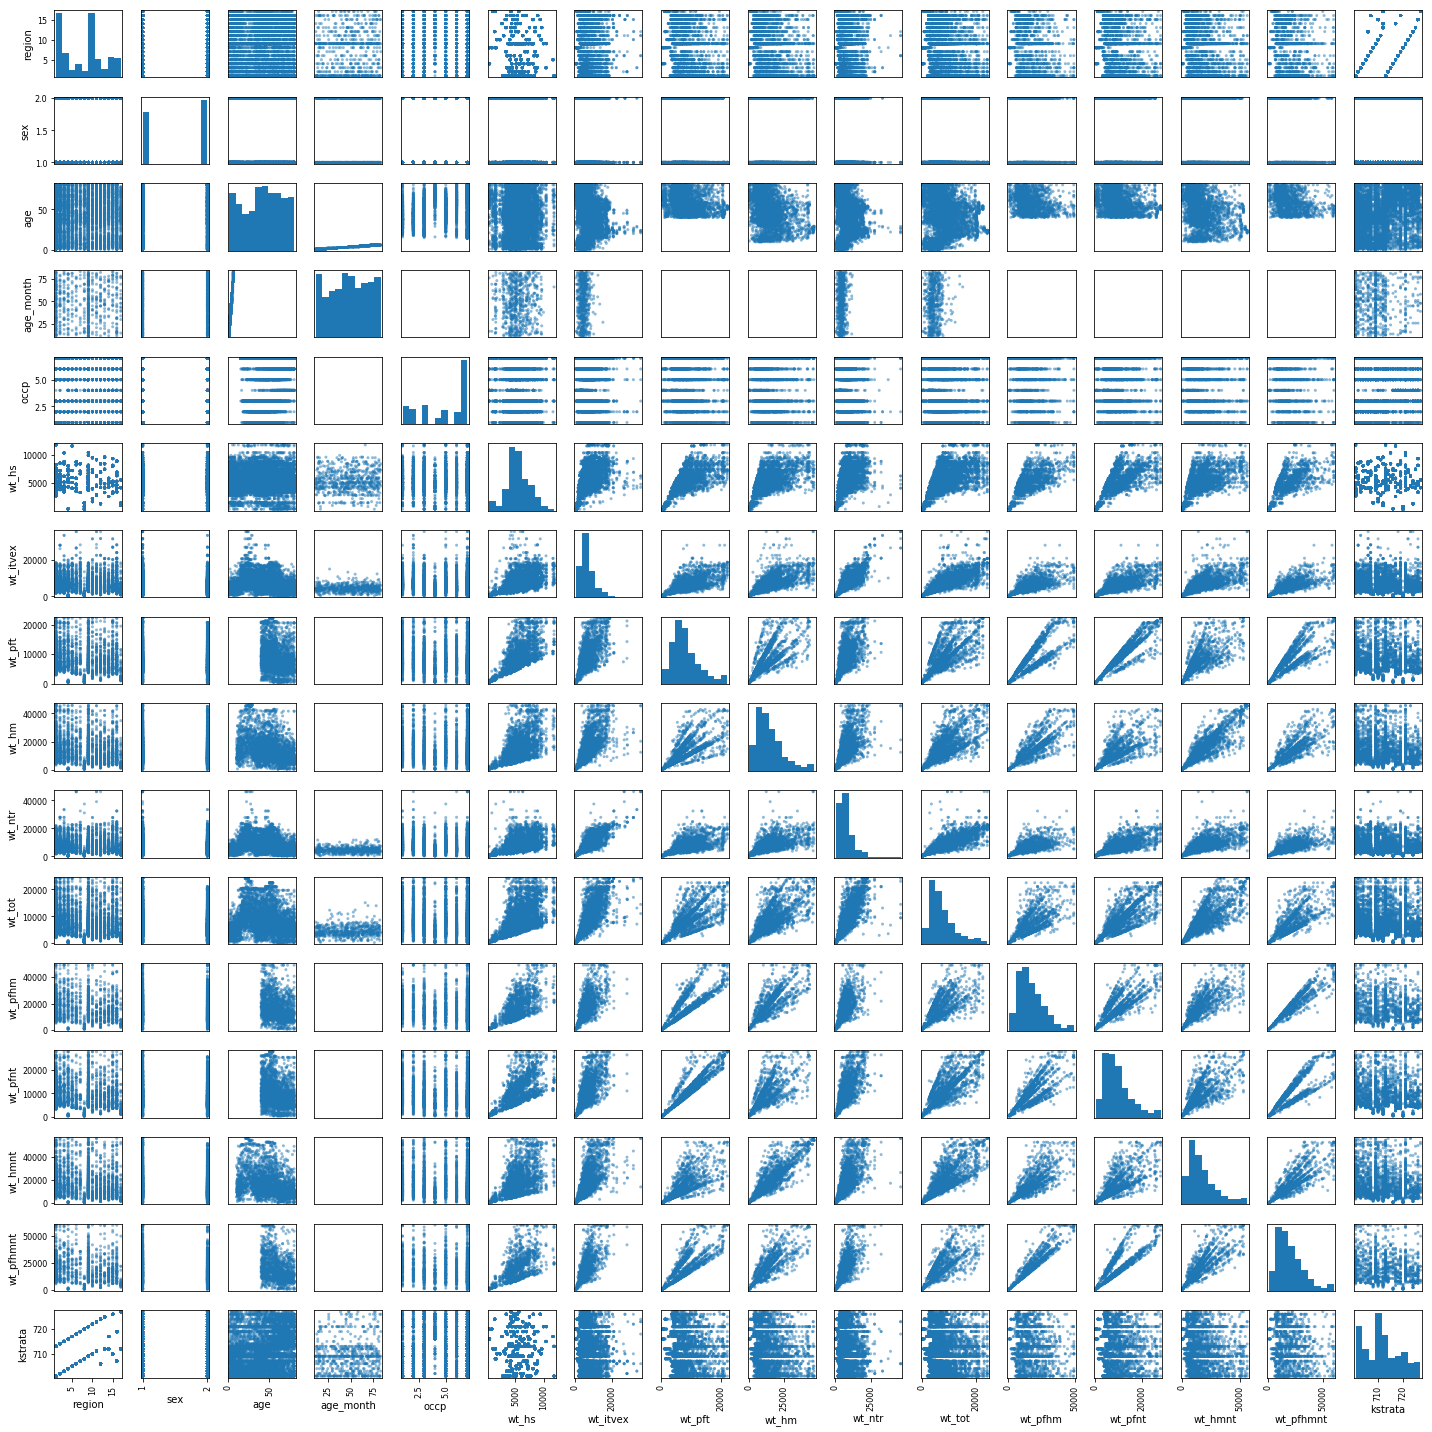

In [12]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=list(base_list)), figsize=[20,20])
plt.tight_layout()
plt.savefig(r"base.png")
plt.show()

# 2. 혈압 측정

In [112]:
he1_list = getColumnList('HE_rPLS','HE_dbp')
he1_list

Index(['HE_rPLS', 'HE_PLS', 'HE_mPLS', 'HE_nARM', 'HE_sbp1', 'HE_dbp1',
       'HE_sbp2', 'HE_dbp2', 'HE_sbp3', 'HE_dbp3', 'HE_sbp', 'HE_dbp'],
      dtype='object')

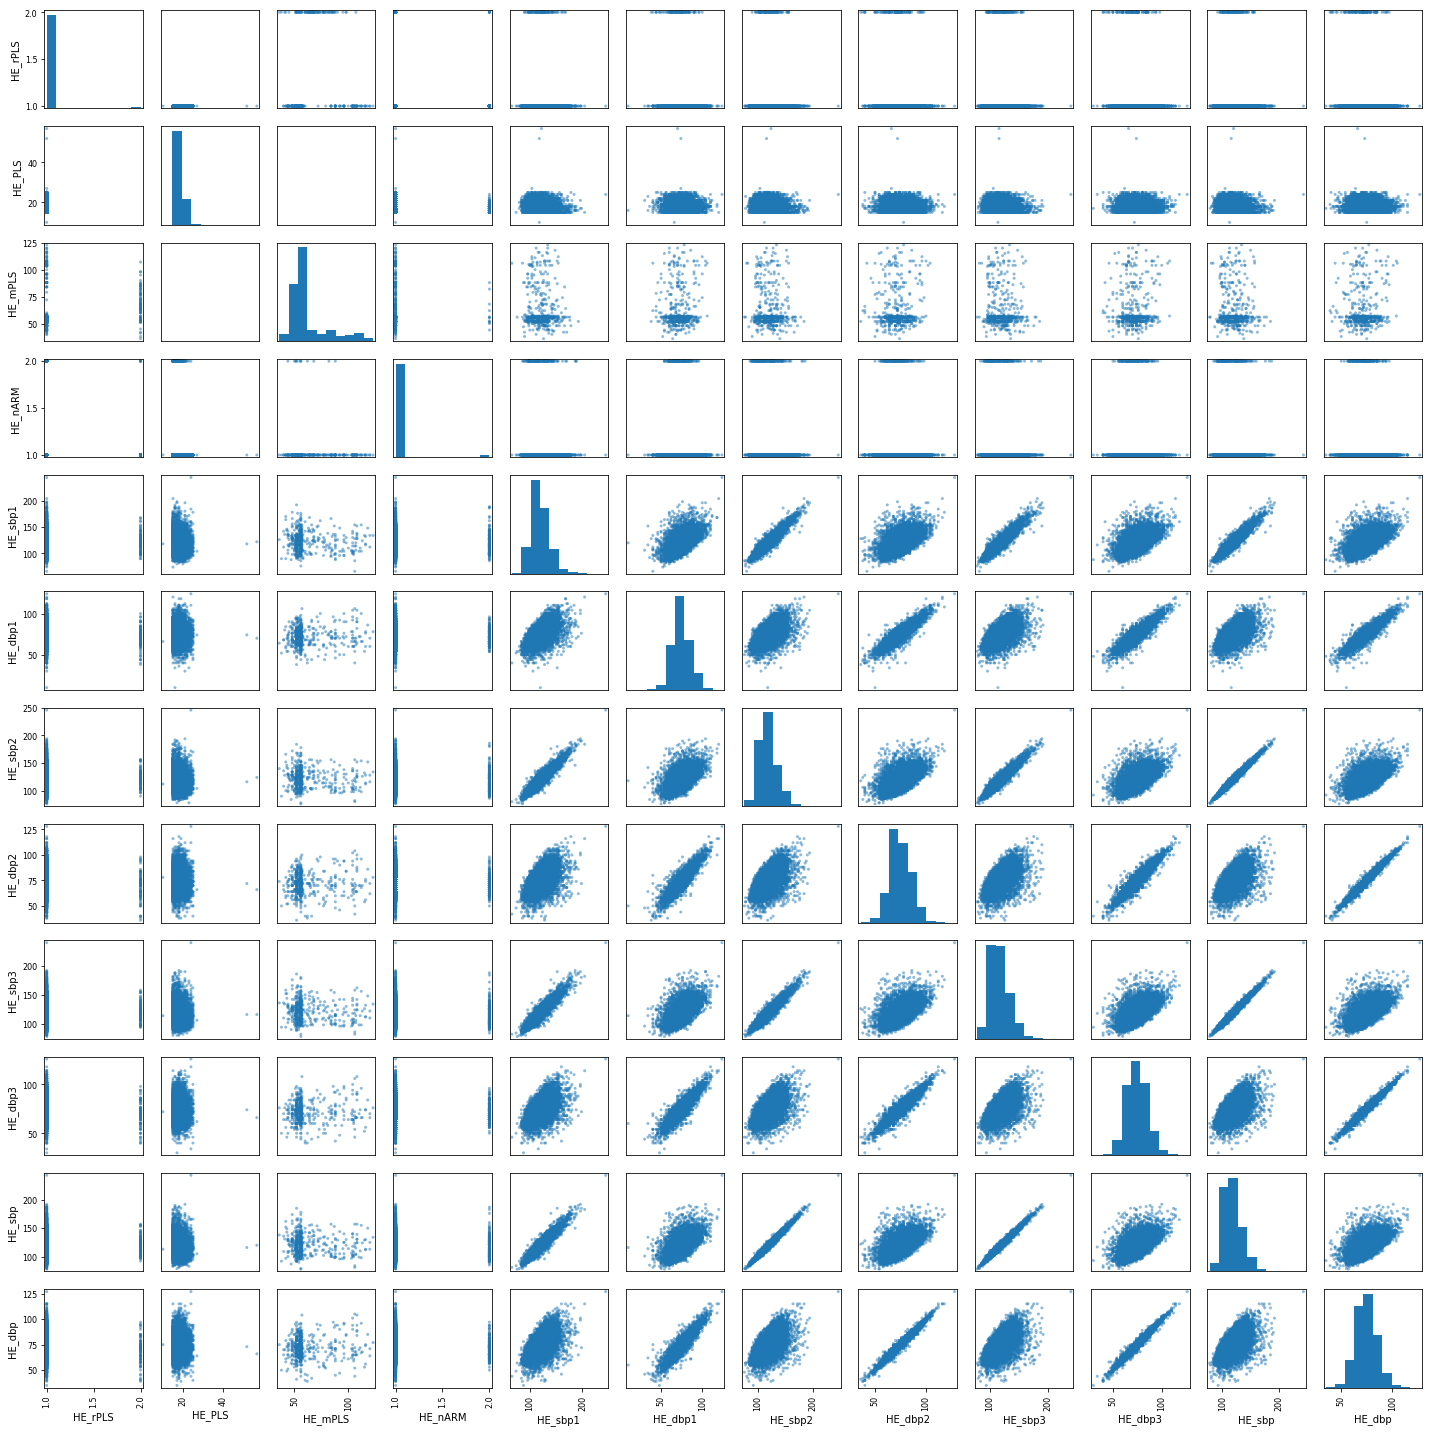

In [124]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=list(he1_list)), figsize=[20,20])
plt.tight_layout()
plt.savefig(r"he1.png")
plt.show()

# 3. 신체계측

In [113]:
he2_list = getColumnList('HE_ht','HE_BMI')
he2_list

Index(['HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI'], dtype='object')

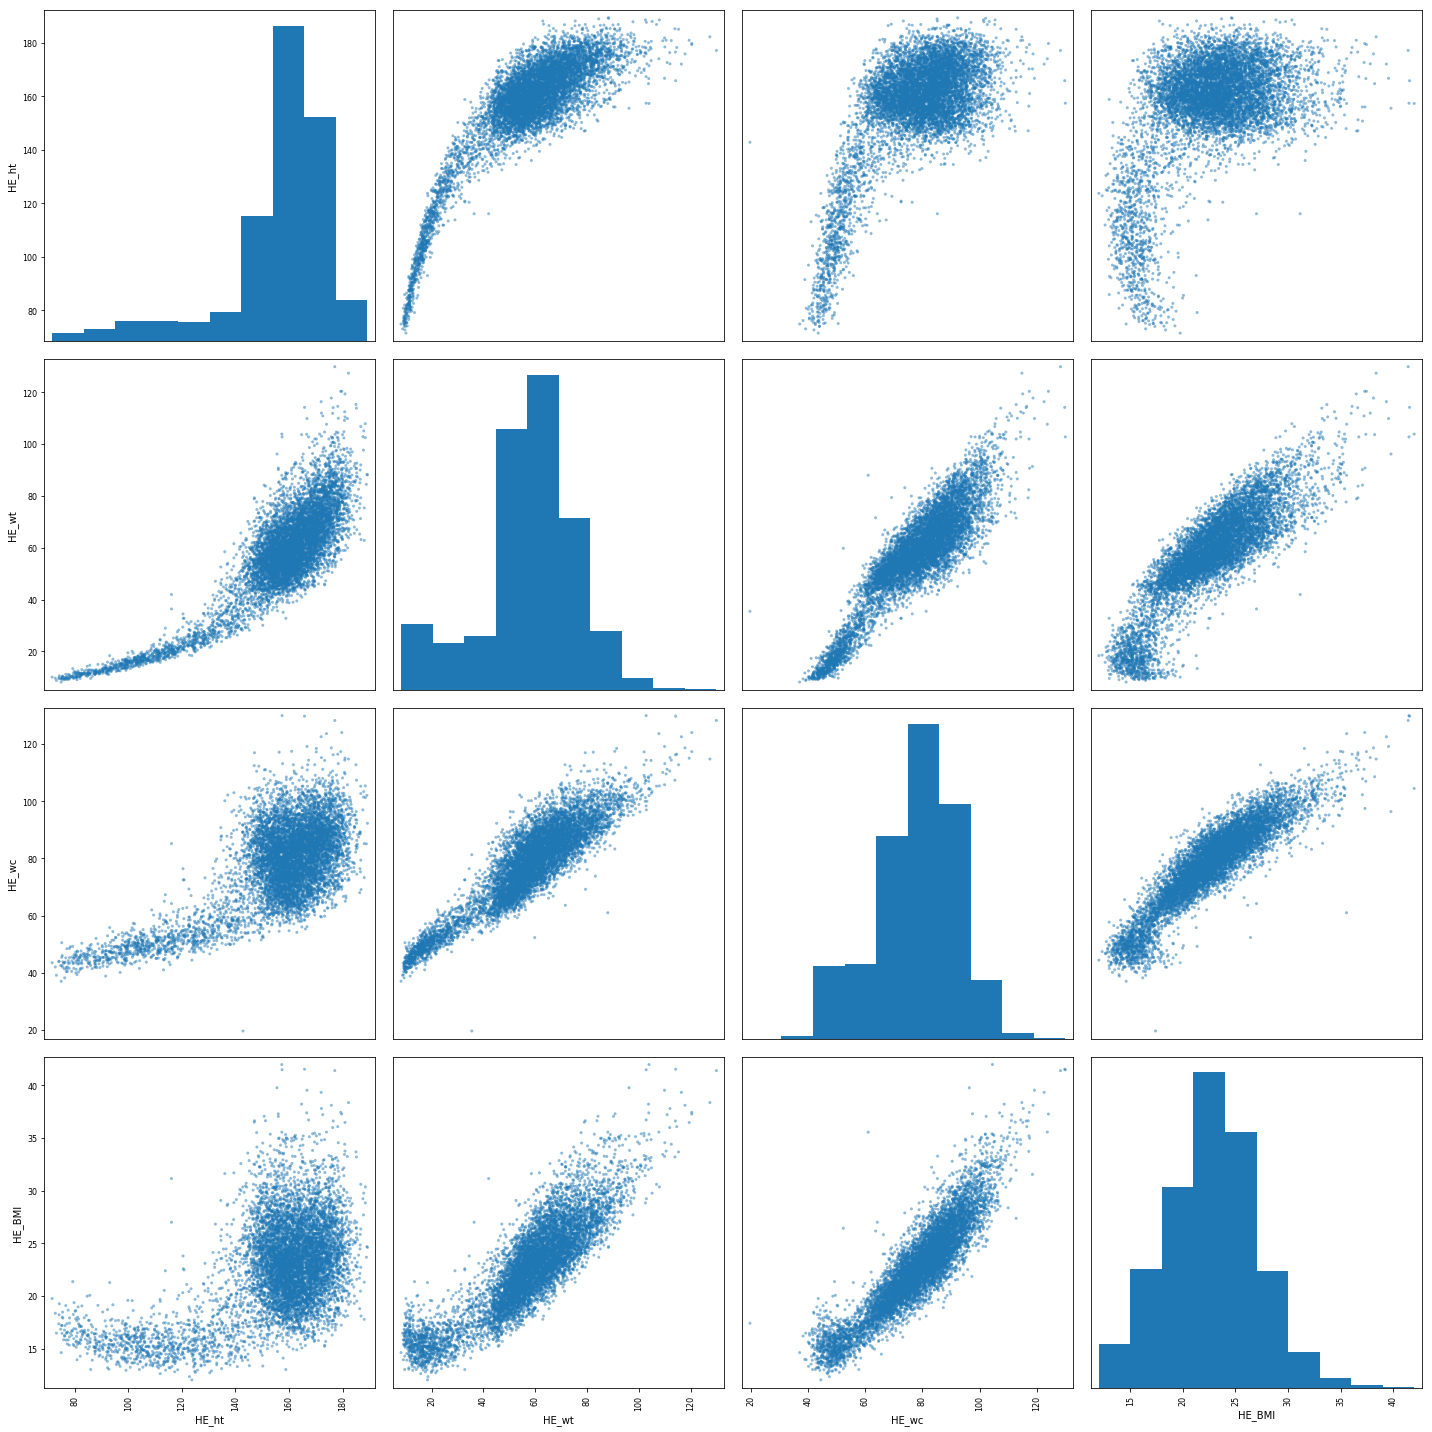

In [125]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=list(he2_list)), figsize=[20,20])
plt.tight_layout()
plt.savefig(r"he2.png")
plt.show()

# Excel로 저장

In [122]:
s_time = time.time()
writer = pd.ExcelWriter('HN16_ALL.xlsx',options={'encoding':'iso-8859-1'})
df_data.to_excel(writer,'Sheet1')
writer.save()
e_time = time.time()
duration = e_time - s_time
duration

65.71913743019104